# Import libraries:

In [1]:
import pandas as pd
import numpy as np
import random as random
import matplotlib.pyplot as plt

# Get inputs:

In [2]:
min_v = float(input("Enter the minimum value (min_v) you want to achieve: "))
max_w = float(input("Enter the maximum weight (max_w) allowed: "))

min_n = int(input("Enter the minimum number of snack types (min_n): "))
max_n = int(input("Enter the maximum number of snack types (max_n): "))


Enter the minimum value (min_v) you want to achieve:  22
Enter the maximum weight (max_w) allowed:  9
Enter the minimum number of snack types (min_n):  1
Enter the maximum number of snack types (max_n):  5


In [3]:
population_size = int(input("Enter population size: "))

Enter population size:  20


In [4]:
max_run = int(input())

 100


# read CSV file and save to Data Frame:

In [5]:

file_path = 'snacks.csv'
df = pd.read_csv(file_path)


In [6]:
print(df)

            Snack  Available Weight  Value
0          MazMaz                10     10
1   Doogh-e-Abali                15     10
2            Nani                 5      5
3            Jooj                 7     15
4         Hot-Dog                20     15
5           Chips                 8      6
6        Nooshaba                12      8
7        Shokolat                 6      7
8       Chocoroll                 9     12
9         Cookies                11     11
10        Abnabat                 4      4
11   Adams-Khersi                14      9
12        Popcorn                16     13
13         Pastil                 3      7
14       Tordilla                10      9
15       Masghati                 5      6
16        Ghottab                 7     10
17   Saghe-Talaei                 9     11
18    Choob-Shoor                13     12


# Part One: Defining Basic Concepts

## Gene:

In [7]:
#Gene:
class Gene:
    def __init__(self, name, max_weight, value_per_weight, weight = 0):
        self.name = name
        self.max_weight = max_weight
        self.weight = weight
        self.value_per_weight = value_per_weight
        
    def __repr__(self):
        return f"Gene(name={self.name}, weight={self.weight}, max_weight={self.max_weight}, value_per_weight={self.value_per_weight})\n"

    def __str__(self):
        return f"{self.name}: Weight={self.weight}, Value per Weight={self.value_per_weight}"


## Chromosome:

In [8]:
class Chromosome:
    def __init__(self, geness, new_born = False):
        self.genes_temp = geness
        self.genes = []
        for g in self.genes_temp:
            self.genes.append(Gene(g.name, g.max_weight, g.value_per_weight, g.weight))
        if (new_born == True):
            for gene in self.genes:
                gene.weight = random.uniform(0, gene.max_weight)
        self.genes.sort(key=lambda x: x.name)
        self.total_weight = sum(gene.weight for gene in self.genes)
        self.total_value = sum(gene.weight * gene.value_per_weight for gene in self.genes)
        self.variety_of_snacks = len(self.genes)
        self.fitness = 0 
         
    
    def __repr__(self):
        return f"\nChromosome(genes=\n{self.genes}, fitness={self.fitness}) \nTotal Weight: {self.total_weight}\nTotal Value: { self.total_value}\nRange: {self.variety_of_snacks}\n"
        
    def __str__(self):
        genes_str = '\n'.join(str(gene) for gene in self.genes)
        return f"\nChromosome Details:\nGenes:\n{genes_str}\nFitness: {self.fitness} \nTotal Weight: {self.total_weight}\nTotal Value: { self.total_value}\nRange: {self.variety_of_snacks}\n"
        



## Genes pool:

In [9]:

genes_pool = df.copy()
genes_pool.rename(columns={'Snack': 'Name'}, inplace=True)
genes_pool.rename(columns={'Available Weight': 'Maximum Weight'}, inplace=True)
genes_pool['Value per Weight'] = genes_pool['Value'] / genes_pool['Maximum Weight']
genes_pool = genes_pool[['Name', 'Maximum Weight', 'Value per Weight']]

gene_objects = [Gene(row['Name'], row['Maximum Weight'], row['Value per Weight']) for index, row in genes_pool.iterrows()]


In [10]:
print(genes_pool)

             Name  Maximum Weight  Value per Weight
0          MazMaz              10          1.000000
1   Doogh-e-Abali              15          0.666667
2            Nani               5          1.000000
3            Jooj               7          2.142857
4         Hot-Dog              20          0.750000
5           Chips               8          0.750000
6        Nooshaba              12          0.666667
7        Shokolat               6          1.166667
8       Chocoroll               9          1.333333
9         Cookies              11          1.000000
10        Abnabat               4          1.000000
11   Adams-Khersi              14          0.642857
12        Popcorn              16          0.812500
13         Pastil               3          2.333333
14       Tordilla              10          0.900000
15       Masghati               5          1.200000
16        Ghottab               7          1.428571
17   Saghe-Talaei               9          1.222222
18    Choob-

In [11]:
print(gene_objects)

[Gene(name=MazMaz, weight=0, max_weight=10, value_per_weight=1.0)
, Gene(name=Doogh-e-Abali, weight=0, max_weight=15, value_per_weight=0.6666666666666666)
, Gene(name=Nani, weight=0, max_weight=5, value_per_weight=1.0)
, Gene(name=Jooj, weight=0, max_weight=7, value_per_weight=2.142857142857143)
, Gene(name=Hot-Dog, weight=0, max_weight=20, value_per_weight=0.75)
, Gene(name=Chips, weight=0, max_weight=8, value_per_weight=0.75)
, Gene(name=Nooshaba, weight=0, max_weight=12, value_per_weight=0.6666666666666666)
, Gene(name=Shokolat, weight=0, max_weight=6, value_per_weight=1.1666666666666667)
, Gene(name=Chocoroll, weight=0, max_weight=9, value_per_weight=1.3333333333333333)
, Gene(name=Cookies, weight=0, max_weight=11, value_per_weight=1.0)
, Gene(name=Abnabat, weight=0, max_weight=4, value_per_weight=1.0)
, Gene(name=Adams-Khersi, weight=0, max_weight=14, value_per_weight=0.6428571428571429)
, Gene(name=Popcorn, weight=0, max_weight=16, value_per_weight=0.8125)
, Gene(name=Pastil, wei

# Part Two: Primary population production

In [12]:
initial_population = []
for _ in range(population_size):
    x = random.randint(min_n, max_n)
    genes_temp = random.sample(gene_objects, x)
    c = Chromosome(genes_temp, True)
    initial_population.append(c)
    c = None


In [13]:
initial_population

[
 Chromosome(genes=
 [Gene(name=Doogh-e-Abali, weight=2.8957685616556468, max_weight=15, value_per_weight=0.6666666666666666)
 , Gene(name=Pastil, weight=0.014644004149446332, max_weight=3, value_per_weight=2.3333333333333335)
 ], fitness=0) 
 Total Weight: 2.910412565805093
 Total Value: 1.9646817174524727
 Range: 2,
 
 Chromosome(genes=
 [Gene(name=Adams-Khersi, weight=11.649765280470898, max_weight=14, value_per_weight=0.6428571428571429)
 , Gene(name=Ghottab, weight=6.719772460773587, max_weight=7, value_per_weight=1.4285714285714286)
 , Gene(name=MazMaz, weight=4.5988373410534695, max_weight=10, value_per_weight=1.0)
 , Gene(name=Nani, weight=1.3001293688878683, max_weight=5, value_per_weight=1.0)
 , Gene(name=Popcorn, weight=1.6110577164601985, max_weight=16, value_per_weight=0.8125)
 ], fitness=0) 
 Total Weight: 25.87956216764602
 Total Value: 24.29676087168738
 Range: 5,
 
 Chromosome(genes=
 [Gene(name=Hot-Dog, weight=8.61201225749891, max_weight=20, value_per_weight=0.75)
 

# Part three: Implementation and specification of compatibility criterion function

## fitness

In [14]:
def calculate_fitness(chromosome):
    fitness = chromosome.total_value
    penalty_weight =max_w - chromosome.total_weight
    penalty_value = chromosome.total_value - min_v
    #penalty_varity = min(chromosome.variety_of_snacks - max_n , min_n - chromosome.variety_of_snacks)
    penalties = 0
    if penalty_weight < 0:
        penalties = penalty_weight 
    if penalty_value < 0:
        penalties = penalties + penalty_value 
    if penalties < 0 :
        fitness = penalties
    return fitness
    


In [15]:
#Update Chromosomes Fitness'
def update_fitness(pop):
    for chromosome in pop:
        chromosome.fitness = calculate_fitness(chromosome)
    return pop
    

In [16]:
initial_population = update_fitness(initial_population)

## find winner

In [17]:
def find_winner(population):
    max_fitness = float('-inf')
    winner = population[0];
    for chromosome in population:
        if (chromosome.fitness > max_fitness):
            max_fitness = chromosome.fitness
            winner = chromosome
    return winner

In [18]:
def check_for_answer(population):
    winner = find_winner(population)
    if winner.fitness >= min_v:
        return winner
    return None

In [19]:
def print_winner(winner):
    for Gene in winner.genes:
        print(f"{Gene.name}: {Gene.weight}")
    print(f"Total Weight: {winner.total_weight}")
    print(f"Total Value: {winner.total_value}")

# Part four: Generating a new generation

## Probability:

In [20]:
prop_c = 0.3
def decide_with_probability(p, thing1, thing2):
    if random.random() < p:
        return thing1
    else:
        return thing2

## Crossover:

In [21]:
def crossover(prob , parent1, parent2, min_n, max_n):
    x = min(len(parent1.genes), len(parent2.genes)) - 1
    if x <= 1:
        return [parent1, parent2]
    cross_point =  random.randint(1, x)
    offspring_genes = parent1.genes + parent2.genes

    counter = 0
    def remove_dupplicate(objects1, objects2, counter):
        def has_duplicate(objects):
            seen_names = set()
            for obj in objects:
                obj_name = obj.name
                if obj_name in seen_names:
                    return obj
                seen_names.add(obj_name)
            return None

        while True and counter < 10000:
            counter = counter + 1
            dup1 = has_duplicate(objects1.genes)
            dup2 = has_duplicate(objects2.genes)
            if dup1 != None:
                if dup2 != None:
                    index1 = objects1.genes.index(dup1)
                    index2 = objects2.genes.index(dup2)
                    objects1.genes.pop(index1)
                    objects2.genes.pop(index2)
                    objects1.genes.append(dup2)
                    objects2.genes.append(dup1)
                else :
                    index1 = objects1.genes.index(dup1)
                    objects1.genes.pop(index1)
                    new = objects2.genes.pop()
                    objects1.genes.append(new)
                    objects2.genes.append(dup1)
                    
            elif dup2 != None:
                    index2 = objects2.genes.index(dup2)
                    objects2.genes.pop(index2)
                    new = objects1.genes.pop()
                    objects2.genes.append(new)
                    objects1.genes.append(dup2)
            else:
                    break;
        return [objects1, objects2], counter 
                
    offspring1_genes = parent1.genes[:cross_point] + parent2.genes[cross_point:]
    offspring2_genes = parent2.genes[:cross_point] + parent1.genes[cross_point:]
    
    child1 = Chromosome(offspring1_genes, False);
    child2 = Chromosome(offspring2_genes, False);

    [child1, child2] , counter = remove_dupplicate(child1, child2, counter)
    if counter == 10000: 
        return  [parent1, parent2]
    def select_new_generation(prob, child1, child2, parent1, parent2):
        if (max_w - child1.total_weight - child2.total_weight > max_w - parent1.total_weight - parent2.total_weight):    
            return decide_with_probability(prob,  [parent1, parent2],  [child1, child2])            
        return decide_with_probability(prob, [child1, child2], [parent1, parent2])

    return select_new_generation(prob, child1, child2, parent1, parent2)
    

def generate_new_population_crossover(prob, population):
    np.random.shuffle(population)
    new_population = []
    for i  in range(0, round((population_size)/2)):
        parent1 = population[i]
        parent2 = population[-i]
        new_generation = crossover(prob , parent1, parent2, min_n, max_n)
        new_population.append(new_generation[0])
        new_population.append(new_generation[1])
    return new_population




## Mutation:

In [22]:

def mutation(prob_m, population):
    np.random.shuffle(population)
    new_population = []
    for i  in range(0, population_size):
        parent = population[i]
        genes = []
        for g in parent.genes:
            genes.append(g)

        genes.sort(key=lambda x: x.value_per_weight)

        pre_gene = genes.pop(0)

        rand_gene = gene_objects
        rand_gene.sort(key=lambda x: x.value_per_weight, reverse=True)

        new_gene = pre_gene
        
        for g in rand_gene:
            if pre_gene.name == g.name:
                break
            if any(x.name == g.name for x in genes) == True:
                continue
            else:
                new_gene = g
                break
        genes.append(new_gene)
        if len(genes) == 0:
            return population

        for g in genes:
            if g.name == new_gene.name:
                g.weight = g.max_weight
                break
     
        child = Chromosome(genes, False)
        #print(f"parent: {parent}")
        #print (f"child: {child}")
        #print("___________")

        genes.clear()
        
        new_generation = decide_with_probability(prob_m, parent, child)
        new_population.append(new_generation)
    return new_population

## Algorithm:

In [23]:
def print_details(population, counter, pre_fit, cur_fit):
    print(counter)
    print(f"current fitness: {cur_fit},pre fitness: {pre_fit}")
    print (f"max fitness: {max(c.fitness for c in population)}")
    print("______________________________________________________")

In [24]:
def plot_detail(y, title):
    x = [i for i in range(0, len(y))]
    plt.plot(x, y)
    plt.xlabel('# runs')
    plt.title(title)
    plt.show()

def plot_details(val_weight_arr, fitness_arr):
    plot_detail(fitness_arr, "total fitness")
    plot_detail(val_weight_arr, "Value Per Weight")
    

#run = 100


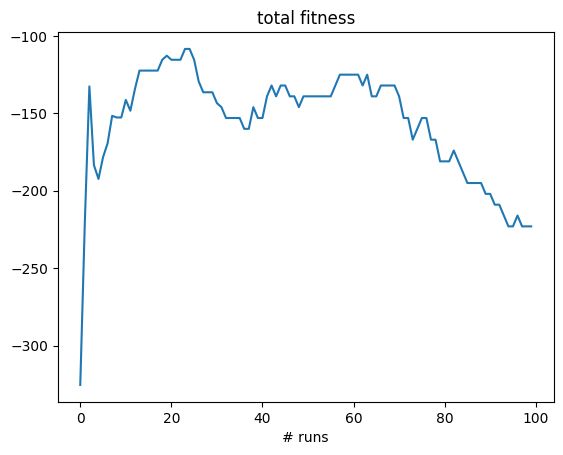

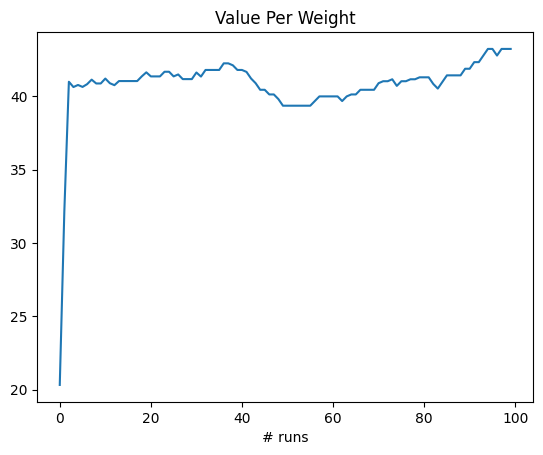

In [25]:
population = initial_population

winner = check_for_answer(initial_population)
counter = 0
cur_fit = sum(c.fitness for c in population)
pre_fit = sum(c.fitness for c in population)
value_per_weight = sum(c.total_value / c.total_weight for c in population)

fitness_arr = []
val_weight_arr = []
while winner == None and counter < max_run:
    #print_details(population, counter, pre_fit, cur_fit)
    fitness_arr.append(cur_fit)
    val_weight_arr.append(value_per_weight)   
    counter = counter + 1
    prob_m = min (1 / (counter + 1), 2 /max_run)
    pre_fit = cur_fit
    new_population = population
    new_population = generate_new_population_crossover(prop_c, population)
    new_population = mutation(prob_m, new_population)
    population = update_fitness(new_population)
    cur_fit = sum(c.fitness for c in population)
    value_per_weight = sum(c.total_value / c.total_weight for c in population)
    winner =check_for_answer(population)
    
#print_details(population, counter, pre_fit, cur_fit)  
print(f"#run = {counter}")
plot_details(val_weight_arr, fitness_arr)



In [26]:
if winner != None:
    print_winner(winner)
else: 
    print("best answer:/n")
    print(find_winner(population))

best answer:/n

Chromosome Details:
Genes:
Jooj: Weight=7, Value per Weight=2.142857142857143
Pastil: Weight=3, Value per Weight=2.3333333333333335
Fitness: -1.0 
Total Weight: 10
Total Value: 22.0
Range: 2



In [27]:
population


[
 Chromosome(genes=
 [Gene(name=Ghottab, weight=7, max_weight=7, value_per_weight=1.4285714285714286)
 , Gene(name=Jooj, weight=7, max_weight=7, value_per_weight=2.142857142857143)
 , Gene(name=Pastil, weight=3, max_weight=3, value_per_weight=2.3333333333333335)
 ], fitness=-8.0) 
 Total Weight: 17
 Total Value: 32.0
 Range: 3,
 
 Chromosome(genes=
 [Gene(name=Ghottab, weight=7, max_weight=7, value_per_weight=1.4285714285714286)
 , Gene(name=Jooj, weight=7, max_weight=7, value_per_weight=2.142857142857143)
 , Gene(name=Pastil, weight=3, max_weight=3, value_per_weight=2.3333333333333335)
 ], fitness=-8.0) 
 Total Weight: 17
 Total Value: 32.0
 Range: 3,
 
 Chromosome(genes=
 [Gene(name=Pastil, weight=3, max_weight=3, value_per_weight=2.3333333333333335)
 ], fitness=-15.0) 
 Total Weight: 3
 Total Value: 7.0
 Range: 1,
 
 Chromosome(genes=
 [Gene(name=Ghottab, weight=7, max_weight=7, value_per_weight=1.4285714285714286)
 , Gene(name=Jooj, weight=7, max_weight=7, value_per_weight=2.14285